In [119]:
pip install --upgrade snowflake-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [120]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
pip install "snowflake-connector-python[pandas]"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [122]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
pip install numpy matplotlib scipy plotly seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns
import plotly.express as px 

In [125]:
import snowflake.connector


In [126]:
from dotenv import load_dotenv
import os

In [127]:
load_dotenv()



True

In [128]:
snow_password = os.environ["SNOWFLAKE_PASSWORD"] 
snow_login = os.environ["SNOWFLAKE_LOGIN"]

conn = snowflake.connector.connect(
    user="SCL",
    password=snow_password,
    account=snow_login
)

In [129]:
conn.cursor().execute("USE DATABASE ANALYTICS")
conn.cursor().execute("USE SCHEMA DBT_SCARTIGNY") 

In [130]:
stg_aircrafts = conn.cursor().execute("SELECT * FROM stg_aircrafts").fetch_pandas_all()
stg_aircrafts.head()

,AIRCRAFT_ID,AIRCRAFT_TYPE,MASS,LENGHT,COST,CAPACITY
0,12d,Flockinator,1000000,10000,100000000,1000
1,12a,Miniflock,50000,2000,2000000,200
2,g72,Goose,200000,5000,3000000,500
3,t10,Thundercat,1500000,20000,400000000,2000
4,b23,Bezantium,4000000,100000,1000000000,5000


In [131]:
stg_airlines = conn.cursor().execute("SELECT * FROM stg_airlines").fetch_pandas_all()
stg_airlines.head()

,AIRLINE_CODE,AIRLINE_NAME,MARKET_CAP,EMPLOYEES,AGE
0,FA,Flock Air,1000000000,2000000,10
1,GA,Goose Airways,50000000,30000,6
2,AA,Amazon Airlines,2000000000,10000000,22


In [132]:
stg_airports = conn.cursor().execute("SELECT * FROM stg_airports").fetch_pandas_all()
stg_airports.head()

,AIRPORT_CODE,AIRPORT_NAME,AIRPORT_EMPLOYEES,AIRPORT_SIZE
0,FKT,Flocktopia,1000000,2000000
1,NSA,Nestland Airport,20000,50000
2,AMP,Amazon Mothership,100000,10000


In [133]:
stg_flight_summary_data = conn.cursor().execute("SELECT * FROM stg_flight_summary_data").fetch_pandas_all()
stg_flight_summary_data.head()

,index,DATE,ASM_DOMESTIC,ASM_INTERNATIONAL,FLIGHTS_DOMESTIC,FLIGHTS_INTERNATIONAL,PASSENGERS_DOMESTIC,PASSENGERS_INTERNATIONAL,RPM_DOMESTIC,RPM_INTERNATIONAL,AIRLINE_CODE,AIRPORT_CODE
0,0,2002-10-01,59854,0.0,774,0.0,60464,59.0,38363,0.0,FA,FKT
1,1,2002-11-01,55009,0.0,733,0.0,57649,0.0,36286,0.0,FA,FKT
2,2,2002-12-01,56586,0.0,745,0.0,66240,0.0,41907,0.0,FA,FKT
3,3,2003-01-01,57448,0.0,754,0.0,55317,4.0,35118,0.0,FA,FKT
4,4,2003-02-01,54006,0.0,674,0.0,53216,65.0,33724,0.0,FA,FKT


In [134]:
stg_individual_flights = conn.cursor().execute("SELECT * FROM stg_individual_flights").fetch_pandas_all()
stg_individual_flights.head()

,FLIGHT_ID,AIRLINE_CODE,DEPARTURE_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,AIRCRAFT_ID
0,100001,FA,FKT,NSA,12d
1,100002,FA,FKT,NSA,12d
2,100003,FA,FKT,NSA,12d
3,100004,FA,FKT,NSA,12d
4,100005,FA,FKT,NSA,12d


In [135]:
dim_aircrafts = conn.cursor().execute("SELECT * FROM dim_aircrafts").fetch_pandas_all()
dim_airlines = conn.cursor().execute("SELECT * FROM dim_airlines").fetch_pandas_all()
dim_airports = conn.cursor().execute("SELECT * FROM dim_airports").fetch_pandas_all()
dim_flight_summary_data = conn.cursor().execute("SELECT * FROM dim_flight_summary_data").fetch_pandas_all()
dim_individual_flights = conn.cursor().execute("SELECT * FROM dim_individual_flights").fetch_pandas_all()

# Quel type d'avion a le plus volé ? 

In [136]:
# fct NUMBER_OF_FLIGHTS
fct_number_of_flights = conn.cursor().execute("SELECT * FROM fct_number_of_flights").fetch_pandas_all()
fct_number_of_flights.head()

,AIRCRAFT_TYPE,AIRCRAFT_ID,NUMBER_OF_FLIGHTS
0,Goose,g72,1008
1,Thundercat,t10,553
2,Miniflock,12a,277
3,Bezantium,b23,240
4,Flockinator,12d,192


In [137]:
sizes = fct_number_of_flights["NUMBER_OF_FLIGHTS"]
labels = fct_number_of_flights["AIRCRAFT_TYPE"]

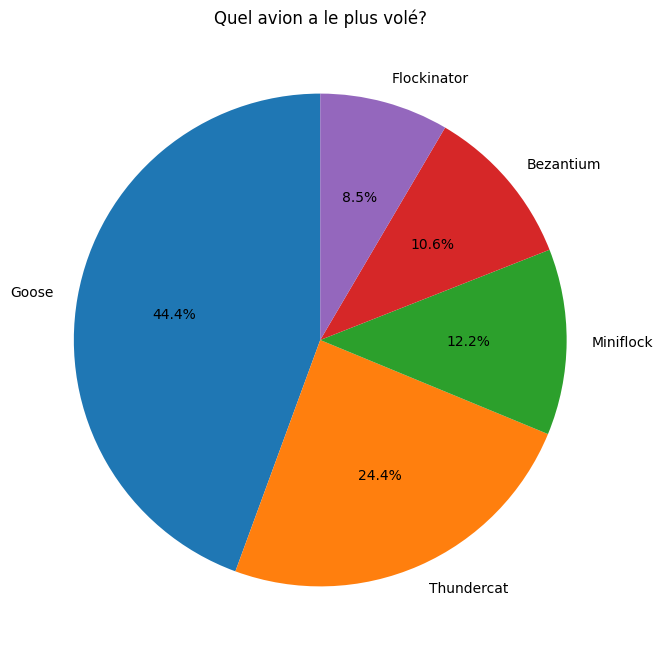

In [138]:
plt.figure(figsize=(10, 8))

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Quel avion a le plus volé?")

plt.show()

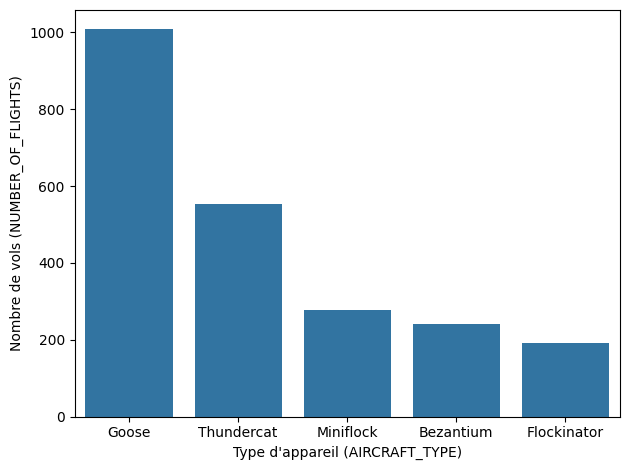

In [139]:
sns.barplot(data=fct_number_of_flights,
            x= "AIRCRAFT_TYPE",
            y= "NUMBER_OF_FLIGHTS")

plt.xlabel("Type d'appareil (AIRCRAFT_TYPE)")
plt.ylabel("Nombre de vols (NUMBER_OF_FLIGHTS)")

plt.tight_layout() 
plt.show()

# Quel aéroport a reçu le plus de voyageurs ? 

In [140]:
fct_airports = fct_airports = conn.cursor().execute("SELECT * FROM fct_airports").fetch_pandas_all()
fct_airports.head()

,AIRPORT_CODE,AIRPORT_NAME,PASSENGERS_NB
0,FKT,Flocktopia,430959170.0
1,NSA,Nestland Airport,179064722.0
2,AMP,Amazon Mothership,80033991.0


C:\Users\simon\AppData\Local\Temp\ipykernel_8772\1476376527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


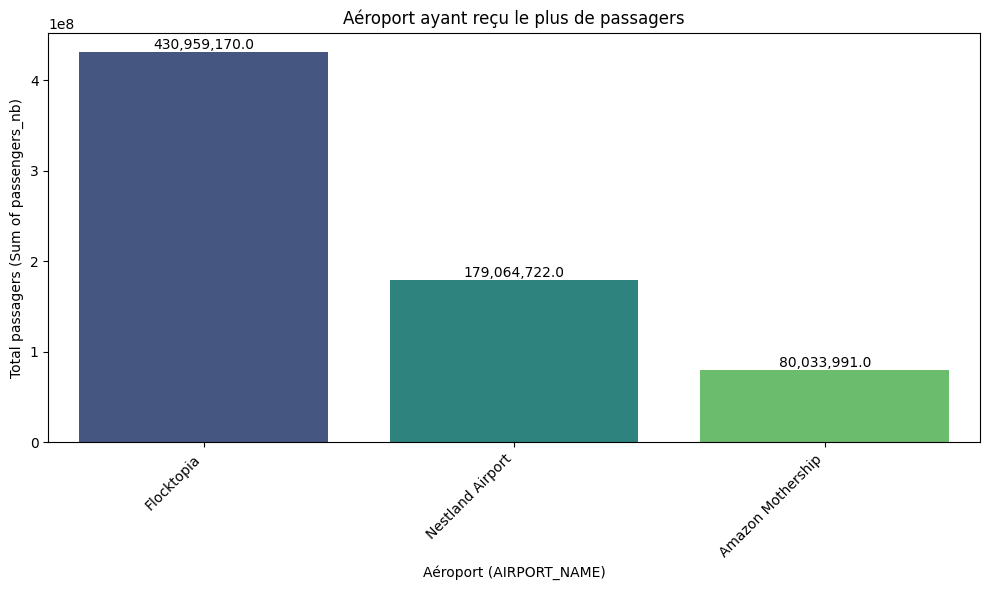

In [141]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=fct_airports,
    x="AIRPORT_NAME",
    y="PASSENGERS_NB",
    palette="viridis" 
)

plt.title('Aéroport ayant reçu le plus de passagers')

plt.xlabel("Aéroport (AIRPORT_NAME)")
plt.ylabel("Total passagers (Sum of passengers_nb)")

for index, row in fct_airports.iterrows():
    plt.text(
        index,                  # Position X (index de la barre)
        row["PASSENGERS_NB"],   # Position Y (hauteur de la barre)
        f'{row["PASSENGERS_NB"]:,}', # Texte à afficher
        color='black',
        ha="center",            # Alignement horizontal
        va="bottom"             # Alignement vertical (en haut de la barre)
    )

plt.xticks(rotation=45, ha='right')

plt.tight_layout() 
plt.show()

# Quelle a été la meilleure année niveau recettes RPM pour l'ensemble des compagnies aériennes ? 

In [142]:
# Import de la fct_airlines
fct_airlines = fct_airlines = conn.cursor().execute("SELECT * FROM fct_airlines").fetch_pandas_all()
fct_airlines.head()

,AIRLINE_CODE,AIRLINE_NAME,YEAR,TOTAL_REVENUE,METRIQUE
0,AA,Amazon Airlines,2015,9175044.0,Revenu Domestique
1,FA,Flock Air,2016,13405774.0,Revenu Domestique
2,GA,Goose Airways,2016,34637841.0,Revenu Domestique
3,AA,Amazon Airlines,2016,2792855.0,Revenu International
4,FA,Flock Air,2016,3912894.0,Revenu International


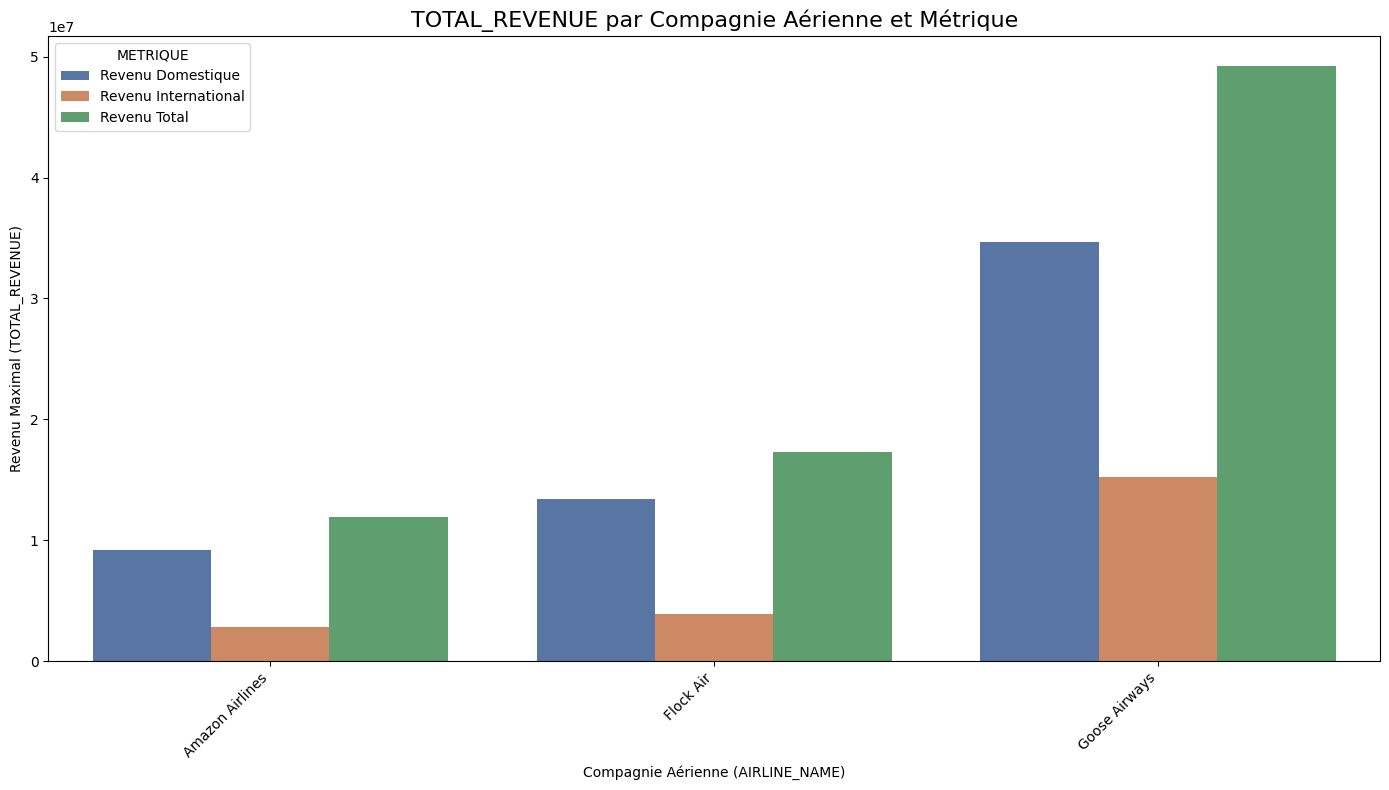

In [154]:
plt.figure(figsize=(14, 8))

ax = sns.barplot(
    data=fct_airlines,
    x="AIRLINE_NAME",
    y="TOTAL_REVENUE",
    hue="METRIQUE", 
    palette="deep" 
)

plt.title('TOTAL_REVENUE par Compagnie Aérienne et Métrique', fontsize=16)
plt.xlabel("Compagnie Aérienne (AIRLINE_NAME)")
plt.ylabel("Revenu Maximal (TOTAL_REVENUE)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="METRIQUE")



plt.tight_layout() 
plt.show()

# Quelle a été la meilleure année de croissance pour chaque compagnie aérienne ? 

In [144]:
# Import de la fct_croissance_per_year
fct_croissance_per_year = fct_croissance_year = conn.cursor().execute("SELECT * FROM fct_croissance_year").fetch_pandas_all()
fct_croissance_per_year.head()

,AIRLINE_CODE,AIRLINE_NAME,YEAR,AVG_ASM_DOMESTIC,PREVIOUS_YEAR,TAUX_CROISSANCE
0,AA,Amazon Airlines,2002,315931.000000,NaN,NaN
1,AA,Amazon Airlines,2003,295645.527778,315931.000000,-6.42
2,AA,Amazon Airlines,2004,296641.388889,295645.527778,0.34
3,AA,Amazon Airlines,2005,255289.083333,296641.388889,-13.94
4,AA,Amazon Airlines,2006,270788.361111,255289.083333,6.07


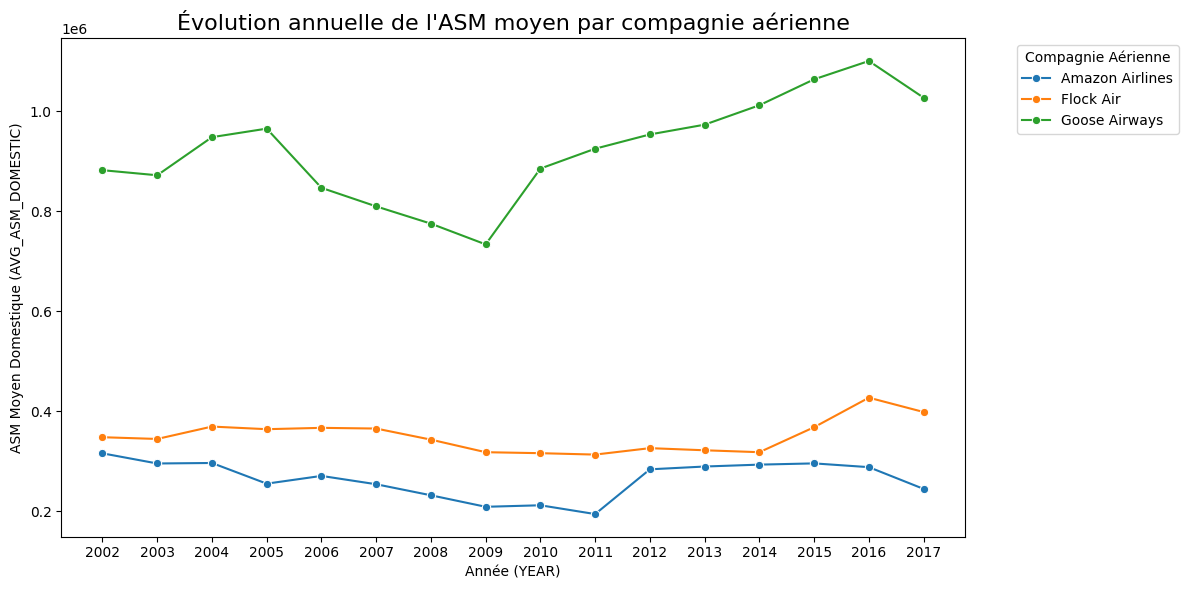

In [145]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=fct_croissance_per_year,
    x="YEAR",
    y="AVG_ASM_DOMESTIC",
    hue="AIRLINE_NAME",  
    marker="o"           # Ajout marqueur à chaque point de données 
)

plt.title("Évolution annuelle de l'ASM moyen par compagnie aérienne", fontsize=16)

plt.xlabel("Année (YEAR)")
plt.ylabel("ASM Moyen Domestique (AVG_ASM_DOMESTIC)")

plt.legend(title='Compagnie Aérienne', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(fct_croissance_per_year['YEAR'].unique())

plt.tight_layout() 
plt.show()

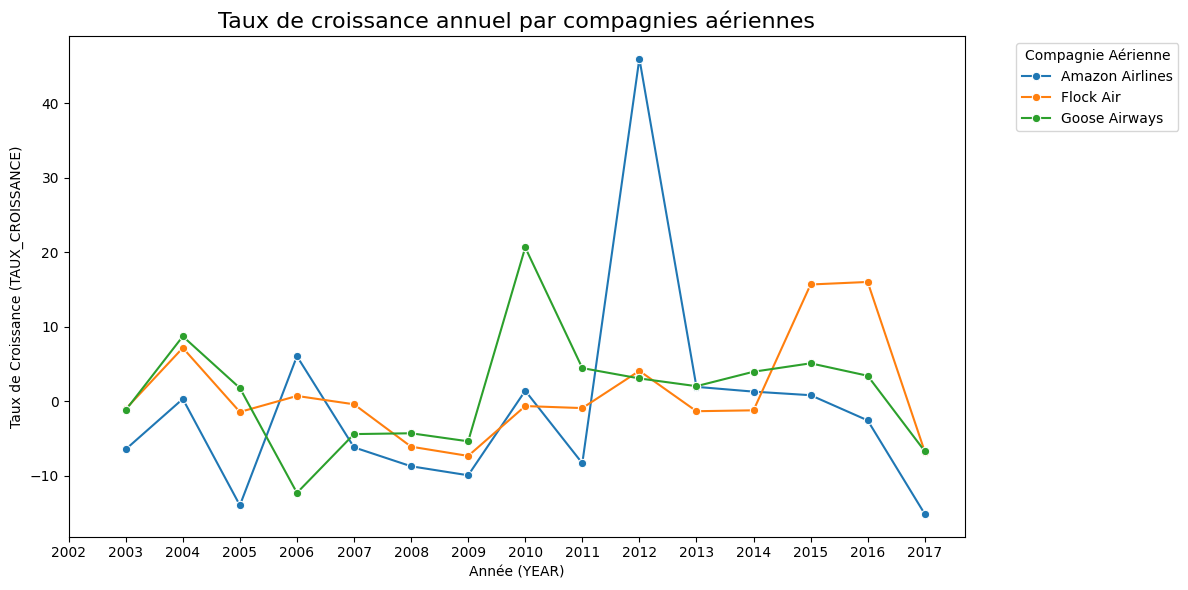

In [146]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=fct_croissance_per_year,
    x="YEAR",
    y="TAUX_CROISSANCE",
    hue="AIRLINE_NAME",  
    marker="o"           
)

plt.title("Taux de croissance annuel par compagnies aériennes", fontsize=16)

plt.xlabel("Année (YEAR)")
plt.ylabel("Taux de Croissance (TAUX_CROISSANCE)")

plt.legend(title='Compagnie Aérienne', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(fct_croissance_per_year['YEAR'].unique())

plt.tight_layout() 
plt.show()

In [147]:
# Import de la fct_croissance
fct_croissance = fct_croissance = conn.cursor().execute("SELECT * FROM fct_croissance").fetch_pandas_all()
fct_croissance.head()

,AIRLINE_CODE,AIRLINE_NAME,BEST_YEAR,BEST_TAUX_CROISSANCE
0,AA,Amazon Airlines,2012,46.02
1,FA,Flock Air,2016,16.04
2,GA,Goose Airways,2010,20.67


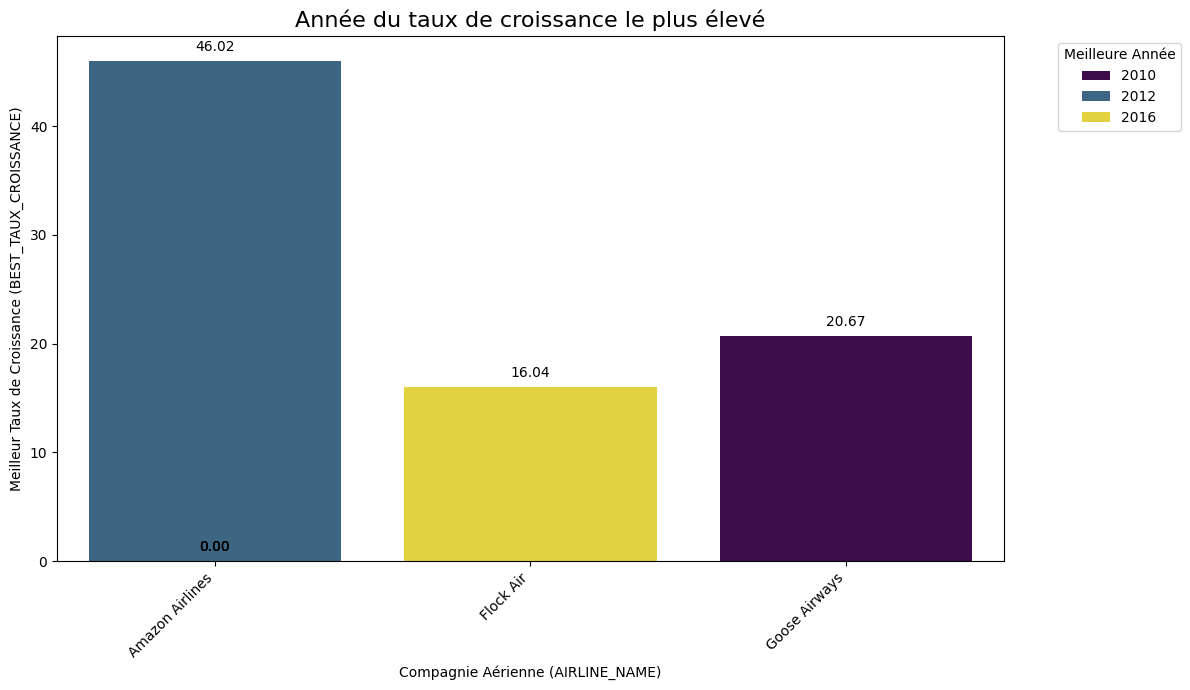

In [148]:
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=fct_croissance,
    x="AIRLINE_NAME",
    y="BEST_TAUX_CROISSANCE",
    hue="BEST_YEAR",  
    dodge=False,      
    palette="viridis" 
)

plt.title("Année du taux de croissance le plus élevé", fontsize=16)

plt.xlabel("Compagnie Aérienne (AIRLINE_NAME)")
plt.ylabel("Meilleur Taux de Croissance (BEST_TAUX_CROISSANCE)")

plt.xticks(rotation=45, ha='right')

plt.legend(title='Meilleure Année', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom',
        fontsize=10,
        xytext=(0, 5),
        textcoords='offset points'
    )


plt.tight_layout()
plt.show()

# import des documents en CSV

In [149]:
#Téléchargement des tables facts en .csv avant la fin de la période d'essai sur SNOWFLAKE et DBT
fct_croissance.to_csv("fct_croissance.csv",index=False)
fct_airlines.to_csv("fct_airlines.csv",index=False)
fct_airports.to_csv("fct_airports.csv",index=False)
fct_croissance_per_year.to_csv("fct_croissance_per_year.csv",index=False)
fct_number_of_flights.to_csv("fct_number_of_flights.csv",index=False)

In [150]:
#Téléchargement des tables dimensions en .csv avant la fin de la période d'essai sur SNOWFLAKE et DBT 
dim_aircrafts.to_csv("dim_aircraft.csv",index=False)
dim_airlines.to_csv("dim_airlines.csv",index=False)
dim_airports.to_csv("dim_airports.csv",index=False)
dim_flight_summary_data.to_csv("dim_flight_summary_data.csv",index=False)
dim_individual_flights.to_csv("dim_individual_flights.csv",index=False)

In [151]:
#Téléchargement des staging en .csv avant la fin de la période d'essai sur SNOWFLAKE et DBT
stg_aircrafts.to_csv("stg_aircrafts.csv",index=False)
stg_airlines.to_csv("stg_airlines.csv",index=False)
stg_airports.to_csv("stg_airports.csv",index=False)
stg_flight_summary_data.to_csv("stg_flight_summary_data.csv",index=False)
stg_individual_flights.to_csv("stg_individual_flights.csv",index=False)